### Week 10 Assignment

Build and train a basic neural network to classify handwritten digits using the MNIST
dataset.

##### Import Libraries

In [16]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

##### Loading and Preprocessing the MNIST Dataset
The MNIST dataset has images of 28x28 pixels, each representing a digit (0–9). We are going to load and normalize the data for faster and better training.

In [19]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


##### Let's have a view the first 10 images of our dataset

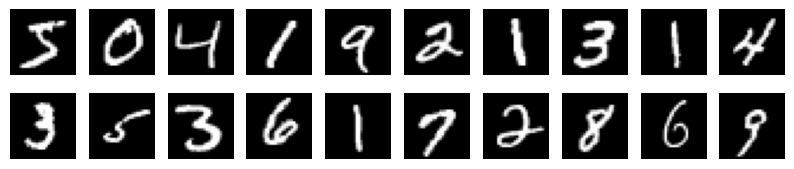

In [22]:
# Display the shape of the dataset
#print("Training data shape:", x_train.shape)
#print("Training labels shape:", y_train.shape)
#print("Test data shape:", x_test.shape)
#print("Test labels shape:", y_test.shape)

# Plot the first 10 images from the training dataset
plt.figure(figsize=(10, 2))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    #plt.title(f"{y_train[i]}")
plt.show()

##### Building the Neural Network Model
This model will have a flattening layer (to convert 2D images into a 1D vector), then we will have two dense layers.

In [25]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten the 28x28 images to 1D vector
    Dense(128, activation='relu'),       # Hidden layer with 128 units
    Dense(64, activation='relu'),        # Hidden layer with 64 units
    Dense(10, activation='softmax')      # Output layer for 10 classes (digits 0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### Train the Model

In [28]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8651 - loss: 0.4692 - val_accuracy: 0.9637 - val_loss: 0.1251
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9669 - loss: 0.1100 - val_accuracy: 0.9683 - val_loss: 0.1088
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9777 - loss: 0.0718 - val_accuracy: 0.9708 - val_loss: 0.0997
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9846 - loss: 0.0477 - val_accuracy: 0.9662 - val_loss: 0.1127
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9753 - val_loss: 0.0884
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0307 - val_accuracy: 0.9745 - val_loss: 0.0980
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0251 - val_accuracy: 0.9748 - val_loss: 0.1017
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9931 - loss: 0.0208 

##### Evaluating the Model

In [31]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.1155
Test accuracy: 0.9772


##### Let's make predictions

In [34]:
# Predict classes for the test set
predictions = model.predict(x_test)
predicted_classes = tf.argmax(predictions, axis=1)

# Print the first 10 predictions
print(predicted_classes[:10])
# Predict class labels for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
tf.Tensor([7 2 1 0 4 1 4 9 6 9], shape=(10,), dtype=int64)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


This Neural Network Model has accuracy of 97% on the MNIST dataset, which makes it an exciting model to work with.

In [37]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

In [39]:
# Calculate TP, FP, FN, TN for each class
num_classes = conf_matrix.shape[0]
for i in range(num_classes):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    
    print(f"Class {i}:")
    print(f"  TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}\n")

Class 0:
  TP: 971, FP: 9, FN: 9, TN: 9011

Class 1:
  TP: 1121, FP: 11, FN: 14, TN: 8854

Class 2:
  TP: 1008, FP: 22, FN: 24, TN: 8946

Class 3:
  TP: 987, FP: 21, FN: 23, TN: 8969

Class 4:
  TP: 953, FP: 21, FN: 29, TN: 8997

Class 5:
  TP: 874, FP: 28, FN: 18, TN: 9080

Class 6:
  TP: 943, FP: 19, FN: 15, TN: 9023

Class 7:
  TP: 1003, FP: 31, FN: 25, TN: 8941

Class 8:
  TP: 958, FP: 46, FN: 16, TN: 8980

Class 9:
  TP: 954, FP: 20, FN: 55, TN: 8971



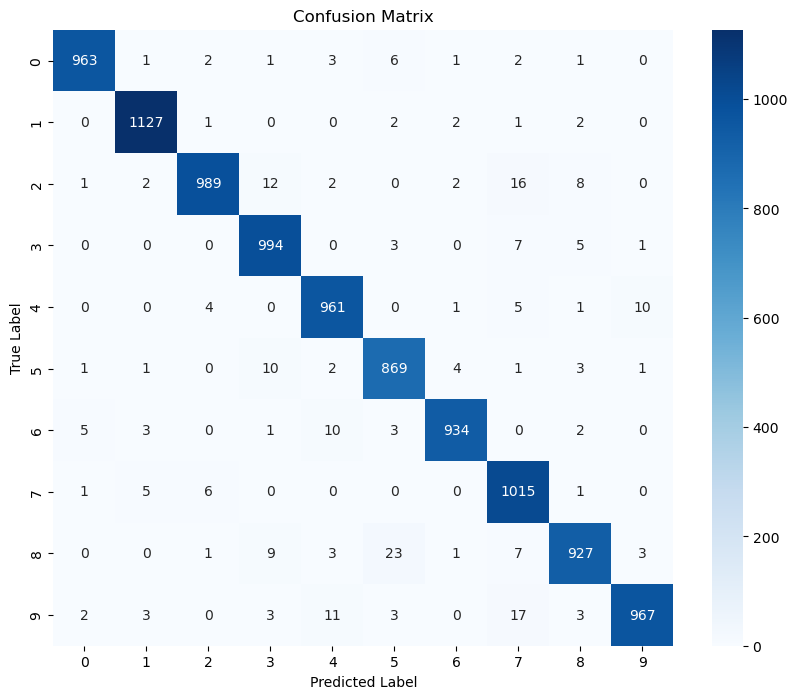

In [111]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()